In [1]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv("sarcos_inv.csv",header = None)

In [3]:
data= (data- data.mean())/ data.std()

In [4]:
def computeCost(X, y, theta): 
    inner= np.power(((X* theta.T)- y),2)
    return np.sum(inner)/ (2 * len(X))

In [5]:
def gradientDescent(X, y, theta, alpha, iters): 
    
    temp= np.matrix(np.zeros(theta.shape))
    parameters= int(theta.ravel().shape[1])
    cost= np.zeros(iters)
    for i in range(iters):
        error= (X* theta.T)- y
        
        for j in range(parameters):
            term= np.multiply(error, X[:,j])
            temp[0,j]= theta[0,j]- ((alpha/ len(X))* np.sum(term))
            
        theta= temp
        cost[i]= computeCost(X, y, theta)
    return theta, cost

In [6]:
# add ones column
# data.insert(0,'Ones',1)

# set X (training data) and y (target variable)
cols= data.shape[1] 
X= data.iloc[:,0:cols-1] 
y= data.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X= np.matrix(X.values) 
y= np.matrix(y.values) 
theta= np.matrix(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]))

In [7]:
alpha= 0.01 
iters= 1000

# perform linear regression on the data set
g, cost= gradientDescent(X, y, theta, alpha, iters)

# get the cost (error) of the model
computeCost(X, y, g)

0.042267480444254164

Text(0.5, 1.0, 'Error vs. Training Epoch')

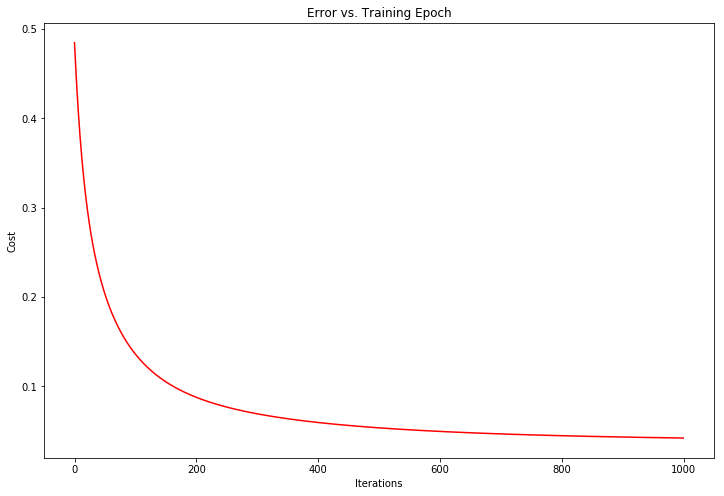

In [9]:
fig, ax= plt.subplots(figsize=(12,8)) 
ax.plot(np.arange(iters), cost,'r') 
ax.set_xlabel('Iterations') 
ax.set_ylabel('Cost') 
ax.set_title('Error vs. Training Epoch')